In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('skupovi_podataka/meteo.csv', sep=';') # Nazivi stupaca su već definirani u CSV datoteci.
data.head()

,Temperatura,Vlaga,Vjetar,Sunce,O3,NO,NO2
0,18.0020,88.451,1.24944,-0.381952,37.3472,1.28611,7.8944
1,18.0028,88.772,0.99861,-0.366761,31.6889,1.36667,9.1917
2,17.9559,89.406,0.80806,-0.310337,27.6667,1.61944,11.1972
3,17.9171,89.896,0.55722,-0.373271,24.0667,1.86944,11.5667
4,17.8494,90.262,0.55056,-0.414504,23.1278,1.37500,11.7500


In [ ]:
data['Temperatura'].median()
# min je 14.5
# max je 37
# median je 25

25.0063

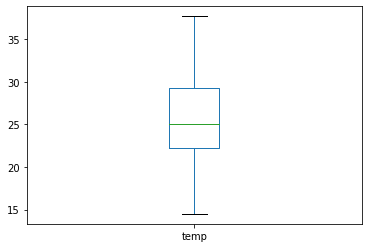

In [ ]:
grafikon = pd.DataFrame({
    'temp': data['Temperatura']
})
grafikon.plot.box()

In [ ]:
def generiraj_brojeve():
  from random import randint

  return (randint(0, 10), randint(10, 20), randint(50, 100))

b1, b2, b3 = generiraj_brojeve()

print (b1, b2, b3)

4 17 70


In [ ]:
# Vlaga	Vjetar	Sunce	O3	NO	NO2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Vlaga', 'Vjetar', 'Sunce', 'O3', 'NO2']],
                 data['Temperatura'], random_state=2)
X_train.head()

,Vlaga,Vjetar,Sunce,O3,NO2
541,60.4330,0.60667,684.3800,37.5833,6.61110
8295,27.5109,2.00389,671.9400,74.2580,3.37222
12468,38.3095,0.82028,1076.3300,70.7860,2.39167
4400,76.1770,1.62139,29.2101,42.9389,2.41944
25299,64.0520,2.46222,538.3900,41.6194,2.77222


In [ ]:
y_test.head(3)

10559    21.2674
29315    27.5760
20574    23.3743
Name: Temperatura, dtype: float64

In [ ]:
y_train_bin = []
y_test_bin = []

for redak in y_train:
  if redak > 20:
    y_train_bin.append(1)
  else:
    y_train_bin.append(0)

for redak in y_test:
  if redak > 20:
    y_test_bin.append(1)
  else:
    y_test_bin.append(0)

y_test_bin[-5:]

[1, 1, 0, 1, 1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
klasifikator = KNeighborsClassifier(n_neighbors=200)
klasifikator.fit(X_train, y_train_bin)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
preciznost = klasifikator.score(X_test, y_test_bin)
preciznost

0.9346721209867361

Pronaći najbolji K za brojeve od 1 do 40. Ispisati koji je to K i koja je preciznost.

In [ ]:
print(X_test.head(1))
print(y_test[0])

         Vlaga   Vjetar    Sunce       O3      NO2
10559  46.3316  2.93056  396.801  49.4167  1.05833
18.002


In [ ]:
klasifikator.predict([[100, 290, 3, 49, 0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
max = 0
najbolji_k = 1

for k in range(1, 41):
  klasifikator = KNeighborsClassifier(n_neighbors=k)
  klasifikator.fit(X_train, y_train_bin)

  preciznost = klasifikator.score(X_test, y_test_bin)

  if preciznost > max:
    max = preciznost
    najbolji_k = k

print("Najbolji k=", najbolji_k, ', a preciznost mu je', max)

Najbolji k= 4 , a preciznost mu je 0.964051072269741


In [ ]:
from sklearn.tree import DecisionTreeClassifier
klasifikator_2 = DecisionTreeClassifier(max_depth=3)
klasifikator_2.fit(X_train, y_train_bin)

DecisionTreeClassifier(max_depth=3)

In [ ]:
preciznost = klasifikator_2.score(X_test, y_test_bin)
print(round(preciznost * 100, 2), '%')

95.51 %


In [ ]:
max = 0
najbolja_dub = 1

for dubina in range(1, 41):
  klasifikator_2 = DecisionTreeClassifier(max_depth=dubina)
  klasifikator_2.fit(X_train, y_train_bin)

  preciznost = klasifikator_2.score(X_test, y_test_bin)

  if preciznost > max:
    max = preciznost
    najbolja_dub = dubina

print("Najbolja dubina=", najbolja_dub, ', a preciznost joj je', max)

Najbolja dubina= 14 , a preciznost joj je 0.9582248667410438


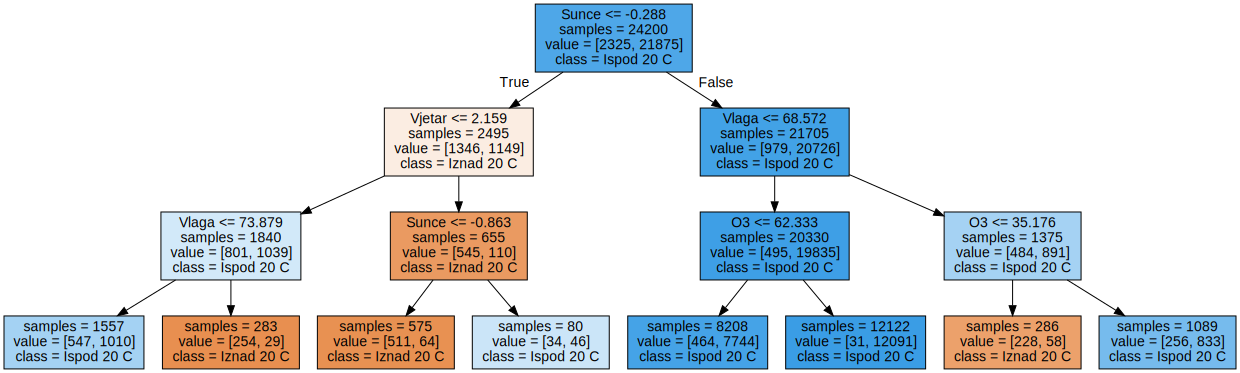

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(klasifikator_2, out_file="stablo.dot", class_names=["Iznad 20 C", "Ispod 20 C"],
                feature_names=['Vlaga', 'Vjetar', 'Sunce', 'O3', 'NO2'], impurity=False, filled=True)

import graphviz
with open("stablo.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)